In [12]:
# Importing the Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings


In [2]:
# Including the dataset
dataset_path = 'diabetes-2-1.csv'
data = pd.read_csv(dataset_path)


In [3]:
NullValue_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace null values (Zeros) with NaN
data[NullValue_columns] = data[NullValue_columns].replace(0, np.nan)

# Missing values
Missing_data = data.isnull().sum()
Missing_data

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [4]:
# Imputing zero values by median imputation for specific columns
imputer = SimpleImputer(missing_values=0, strategy='median')
for column in ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']:
    data[column].fillna(data[column].mean(), inplace=True)

In [5]:
scaler = StandardScaler()
features = data.drop('Outcome', axis=1)
scaled_features = scaler.fit_transform(features)


In [6]:
# Data Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


In [7]:
# Data Descriptives
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

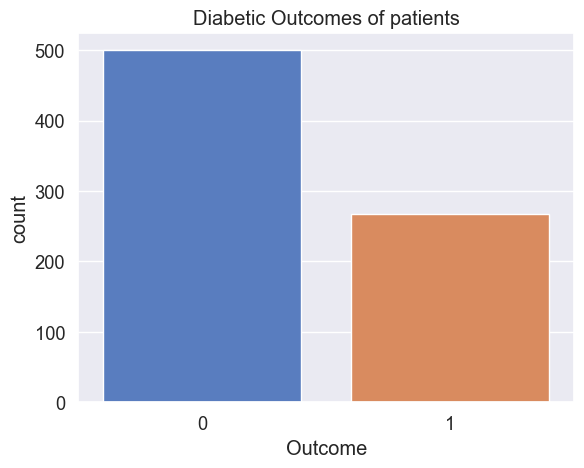

In [13]:
# Checking the Diabetic Outcomes of patients
sns.set(style="darkgrid", font_scale=1.2)
palette = sns.color_palette("muted", n_colors=len(data.columns)-1)

sns.countplot(x='Outcome', data=data, palette=palette)
plt.title('Diabetic Outcomes of patients')
plt.show()

C:\Users\M.M\AppData\Local\Temp\ipykernel_10060\3643035993.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=0.8)


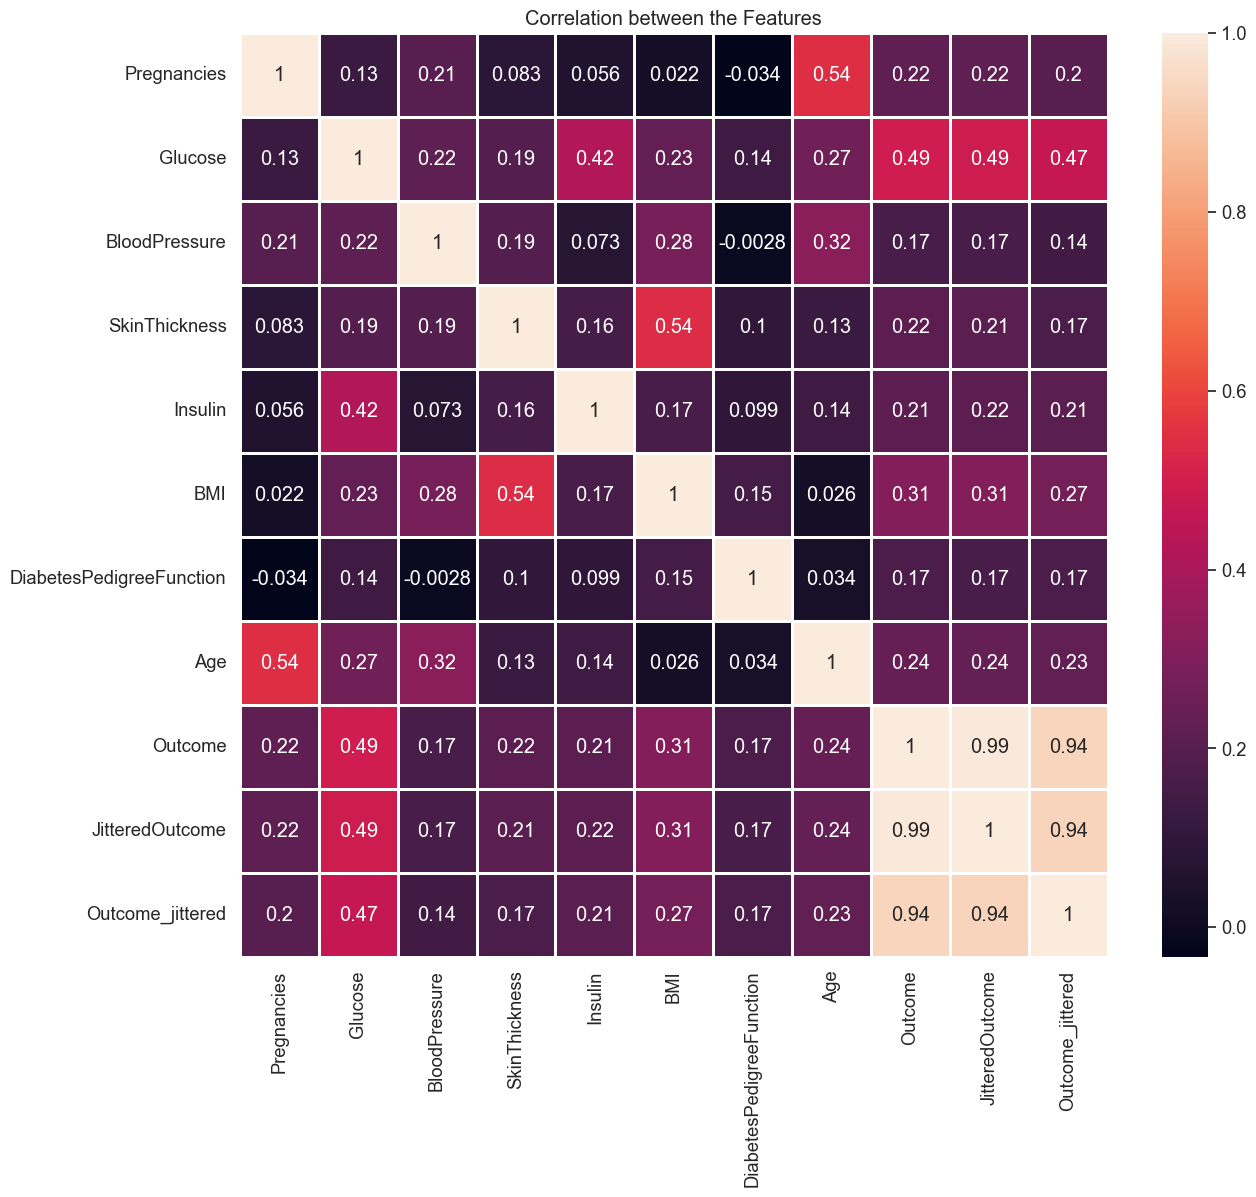

In [33]:
# Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, linewidths=0.8)
plt.title('Correlation between the Features')
plt.show()

C:\Users\M.M\AppData\Local\Temp\ipykernel_10060\1275184907.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Age', y='Glucose', alpha=0.5, palette=palette)


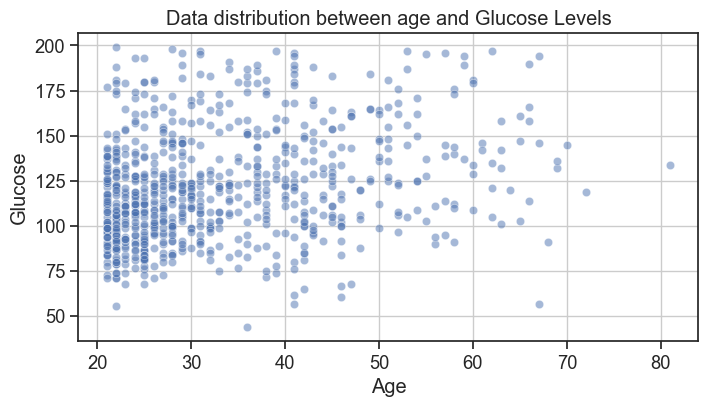

In [20]:
# Data distribution between age and pregnancies
sns.set(style="ticks", font_scale=1.2)
palette = sns.color_palette("muted", n_colors=len(data.columns)-1)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Age', y='Glucose', alpha=0.5, palette=palette)
plt.title('Data distribution between age and Glucose Levels')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

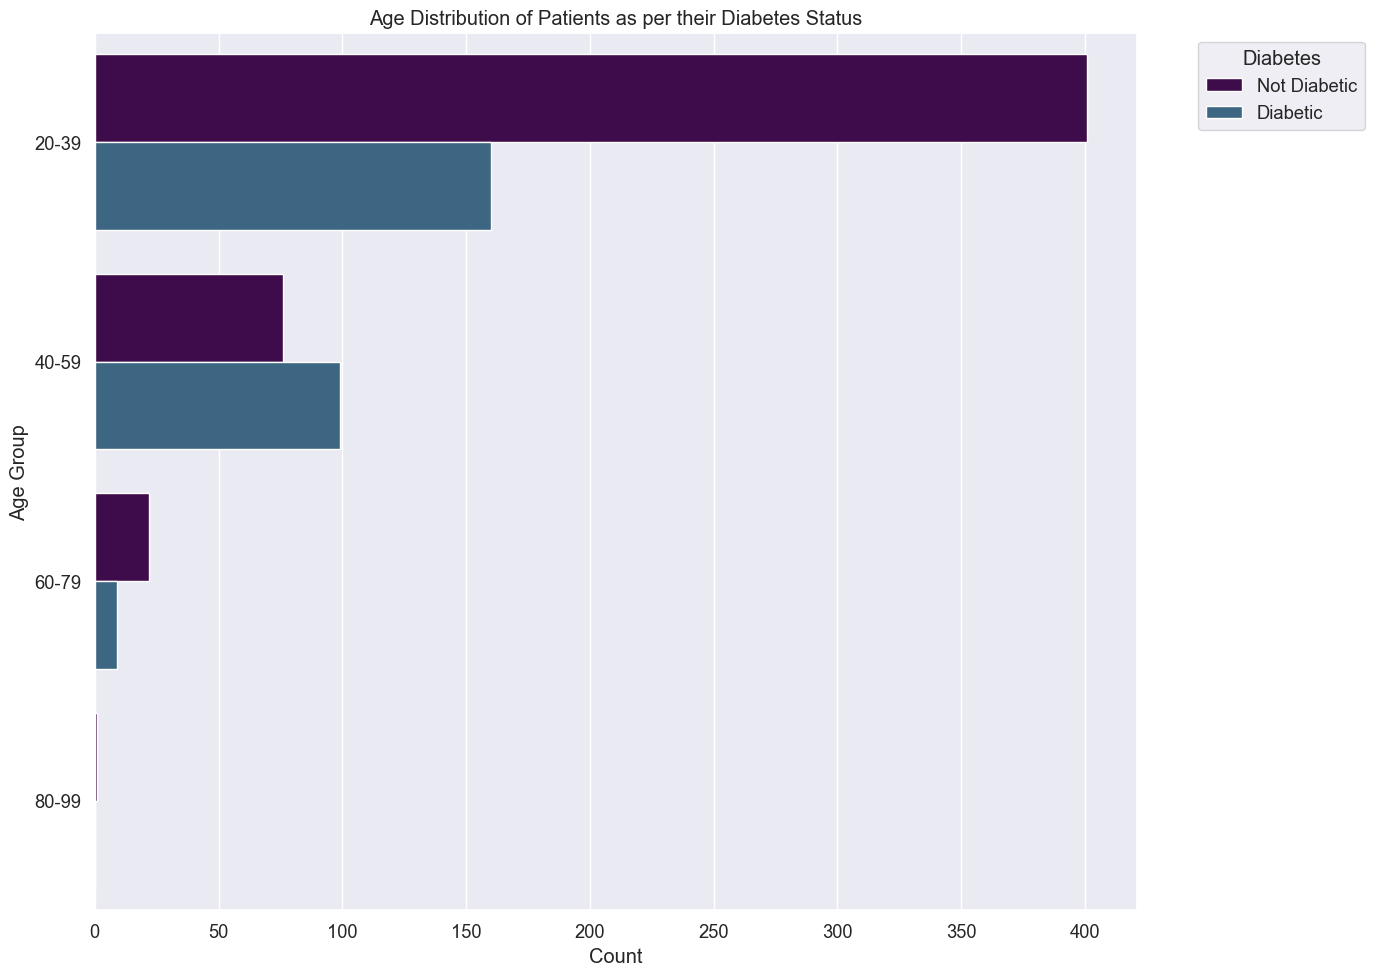

In [26]:
# Age Distibution of Patients
age_range = [20, 40, 60, 80, 100]
age_range_labels = ['20-39', '40-59', '60-79', '80-99']
data['age_group'] = pd.cut(data['Age'], bins=age_range, labels=age_range_labels, right=False)

plt.figure(figsize=(14, 10))

# Use the length of age_range_labels to generate the color map
colors = cm.viridis(np.linspace(0, 1, len(age_range_labels)))

# Plot the horizontal bar chart
sns.countplot(y='age_group', hue='Outcome', data=data, order=age_range_labels, palette=colors)
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Distribution of Patients as per their Diabetes Status')

# Move the legend to the outside of the plot on the right side
plt.legend(title='Diabetes', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Not Diabetic', 'Diabetic'])

# Adjust subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()

plt.show()


C:\Users\M.M\AppData\Local\Temp\ipykernel_10060\1357660003.py:10: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(x='JitteredOutcome', y='DiabetesPedigreeFunction', hue='Outcome', data=data, palette=palette)


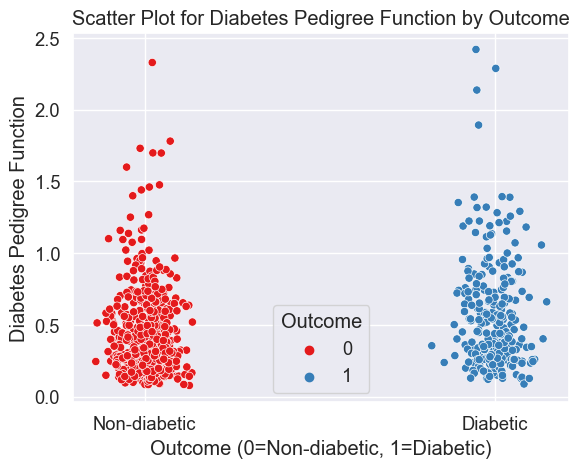

In [23]:
# Setting the styling of the visualizations
sns.set(style="darkgrid", font_scale=1.2)
palette = sns.color_palette("muted", n_colors=len(data.columns)-1)

# Adding a jitter to the 'Outcome' variable for better visualization
data['JitteredOutcome'] = data['Outcome'] + np.random.normal(0, 0.05, size=len(data))

# Scatter plot for Diabetes Pedigree Function value among diabetic and non-diabetic patients
palette = sns.color_palette("Set1")  # Define a color palette if not already defined
sns.scatterplot(x='JitteredOutcome', y='DiabetesPedigreeFunction', hue='Outcome', data=data, palette=palette)
plt.title('Scatter Plot for Diabetes Pedigree Function by Outcome')
plt.xlabel('Outcome (0=Non-diabetic, 1=Diabetic)')
plt.ylabel('Diabetes Pedigree Function')
plt.xticks([0, 1], ['Non-diabetic', 'Diabetic'])  # Set the ticks for clarity
plt.show()

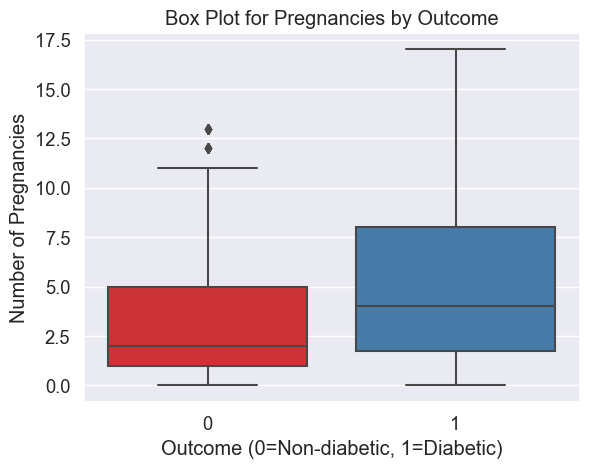

In [24]:
# Box plot for checking the number of pregnancies among diabetic and non-diabetic patients
sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette=palette)
plt.title('Box Plot for Pregnancies by Outcome')
plt.xlabel('Outcome (0=Non-diabetic, 1=Diabetic)')
plt.ylabel('Number of Pregnancies')
plt.show()

C:\Users\M.M\AppData\Local\Temp\ipykernel_24564\989644295.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x='Outcome_jittered', y='Glucose', data=data, hue='Outcome', palette=palette, alpha=0.6)


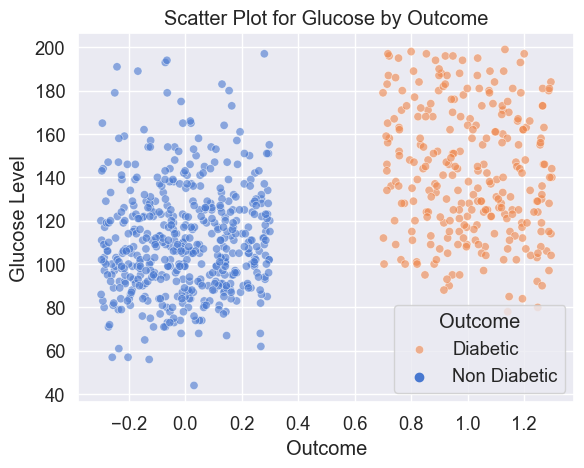

In [14]:
# Setting the styling of the visualizations
sns.set(style="darkgrid", font_scale=1.2)
palette = sns.color_palette("muted", n_colors=len(data.columns)-1)

data['Outcome_jittered'] = data['Outcome'] + np.random.uniform(-0.3, 0.3, size=len(data))

# Scatter plot for checking the glucose level range among diabetic and non-diabetic patients
sns.scatterplot(x='Outcome_jittered', y='Glucose', data=data, hue='Outcome', palette=palette, alpha=0.6)
plt.title('Scatter Plot for Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')

plt.legend(title='Diabetes', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Diabetic', 'Non Diabetic'])

# Reset legend with appropriate labels and title
plt.legend(title='Outcome', labels=['Diabetic', 'Non Diabetic'])

plt.show()

In [6]:
# Splitting data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Initializing the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Dictionary to store the model
QDA_model = {
    "Quadratic Discriminant Analysis": qda_model
}

# Dictionary to store evaluation metrics
QDA_evaluation_results = {}

# Training and evaluating the model
for name, model in QDA_model.items():
    # Training the model
    model.fit(X_train, y_train)
    # Predicting the test set
    y_pred = model.predict(X_test)
    
    # Storing results
    QDA_evaluation_results[name] = {
        "Predictions": y_pred
    }

# Evaluating the QDA Model's Performance
for name, results in QDA_evaluation_results.items():
    y_pred = results['Predictions']
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
    
    # Printing the results
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n")

Results for Quadratic Discriminant Analysis:
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[77 23]
 [24 30]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.76      0.77      0.77       100
    Diabetic       0.57      0.56      0.56        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154





In [7]:
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the MLP Classifier model with some initial hyperparameters
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),  
    activation='relu',          
    solver='adam',              
    max_iter=200,               
    random_state=100            
)

# Dictionary to store the model
MLP_model = {
    "MLP Classifier": mlp_classifier
}

# Dictionary to store evaluation metrics
MLP_evaluation_results = {}

# Training and evaluating the model
for name, model in MLP_model.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    # Predicting the test set
    y_pred = model.predict(X_test_scaled)
    
    # Storing results
    MLP_evaluation_results[name] = {
        "Predictions": y_pred
    }

# Evaluating the MLP Classifier's Performance
for name, results in MLP_evaluation_results.items():
    y_pred = results['Predictions']
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
    
    # Printing the results
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n")

Results for MLP Classifier:
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[84 16]
 [22 32]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.79      0.84      0.82       100
    Diabetic       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154





In [13]:
# Initializing the LDA model
lda_classifier = LinearDiscriminantAnalysis()

# Dictionary to store the model
LDA_model = {
    "Linear Discriminant Analysis": lda_classifier
}

# Dictionary to store evaluation metrics
LDA_evaluation_results = {}

# Training and evaluating the model
for name, model in LDA_model.items():
    # Training the model
    model.fit(X_train, y_train)
    # Predicting the test set
    y_pred = model.predict(X_test)
    
    # Storing results
    LDA_evaluation_results[name] = {
        "Predictions": y_pred
    }

# Evaluating the LDA Classifier's Performance
for name, results in LDA_evaluation_results.items():
    y_pred = results['Predictions']
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
    
    # Printing the results
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n")

Results for Linear Discriminant Analysis:
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[81 19]
 [28 26]]
Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.74      0.81      0.78       100
    Diabetic       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



